# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

y Number - 94 | City Name - bilma
City Number - 95 | City Name - cabo san lucas
City Number - 96 | City Name - talnakh
City Number - 97 | City Name - nikolskoye
City Not Found
City Number - 98 | City Name - bluff
City Number - 99 | City Name - khatanga
City Number - 100 | City Name - broken hill
City Number - 101 | City Name - muisne
City Number - 102 | City Name - sisimiut
City Number - 103 | City Name - ambon
City Number - 104 | City Name - mount gambier
City Number - 105 | City Name - bredasdorp
City Number - 106 | City Name - tuktoyaktuk
City Number - 107 | City Name - chimoio
City Number - 108 | City Name - nioro
City Number - 109 | City Name - richards bay
City Number - 110 | City Name - hopewell
City Number - 111 | City Name - chuy
City Number - 112 | City Name - gat
City Number - 113 | City Name - hobyo
City Number - 114 | City Name - longyearbyen
City Number - 115 | City Name - kapaa
City Number - 116 | City Name - oistins
City Number - 117 | City Name - talcahuano
City Number

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': pd.to_datetime(date, unit="s")
    })
city_df

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hulan Ergi,47.2042,123.6333,11.53,93,{'all': 98},3.38,CN,2021-02-09 20:52:00
1,Neryungri,56.6709,124.6491,-1.35,88,{'all': 70},3.89,RU,2021-02-09 20:52:00
2,Arlit,18.7369,7.3853,73.36,15,{'all': 0},5.70,NE,2021-02-09 20:52:01
3,Tiksi,71.6872,128.8694,-16.40,83,{'all': 100},3.11,RU,2021-02-09 20:52:01
4,Avarua,-21.2078,-159.7750,84.20,74,{'all': 100},8.05,CK,2021-02-09 20:52:02
...,...,...,...,...,...,...,...,...,...
559,Conakry,9.5380,-13.6773,82.40,78,{'all': 40},9.22,GN,2021-02-09 21:00:33
560,Pesochnoye,58.0060,39.1772,2.93,93,{'all': 100},3.98,RU,2021-02-09 21:01:16
561,Singaraja,-8.1120,115.0882,79.36,76,{'all': 100},3.69,ID,2021-02-09 21:01:31
562,Jasper,37.2001,-94.3502,19.99,86,{'all': 90},8.05,US,2021-02-09 21:01:27


In [6]:
city_df.to_csv('Cities Compiled.csv')

In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
humidity_over100 = city_df['Humidity'] > 100
humidity_over100.value_counts()
# No Cities over 100% Humidity - All Columns Returned False

False    564
Name: Humidity, dtype: int64

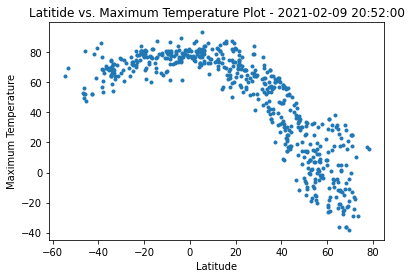

In [8]:
# Latitude vs. Temperature Plot
x_lat = city_df['Latitude']
y_temp = city_df['Maximum Temperature']
plt.scatter(x_lat, y_temp, marker='.')
plt.title(f"Latitide vs. Maximum Temperature Plot - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

## Latitude vs. Humidity Plot

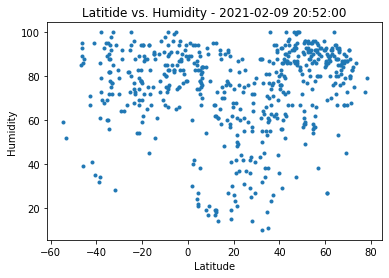

In [9]:
x_lat = city_df['Latitude']
y_hum = city_df['Humidity']
plt.scatter(x_lat, y_hum, marker='.')
plt.title(f"Latitide vs. Humidity - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

## Latitude vs. Cloudiness Plot

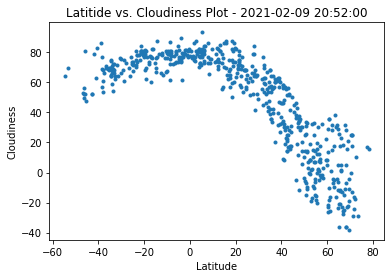

In [10]:
x_lat = city_df['Latitude']
y_cloud = city_df['Cloudiness']
plt.scatter(x_lat, y_temp, marker='.')
plt.title(f"Latitide vs. Cloudiness Plot - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

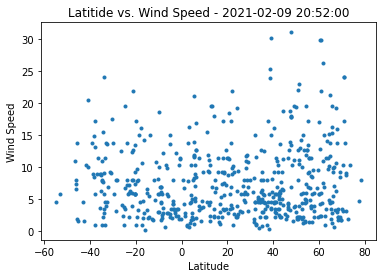

In [11]:
x_lat = city_df['Latitude']
y_wind = city_df['Wind Speed']
plt.scatter(x_lat, y_wind, marker='.')
plt.title(f"Latitide vs. Wind Speed - {city_df['Date'][0]}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
n_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hulan Ergi,47.2042,123.6333,11.53,93,{'all': 98},3.38,CN,2021-02-09 20:52:00
1,Neryungri,56.6709,124.6491,-1.35,88,{'all': 70},3.89,RU,2021-02-09 20:52:00
2,Arlit,18.7369,7.3853,73.36,15,{'all': 0},5.70,NE,2021-02-09 20:52:01
3,Tiksi,71.6872,128.8694,-16.40,83,{'all': 100},3.11,RU,2021-02-09 20:52:01
5,Norman Wells,65.2820,-126.8329,-36.40,67,{'all': 1},3.44,CA,2021-02-09 20:52:02


In [14]:
s_hemi_df = city_df[city_df['Latitude'] <= 0]
s_hemi_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
4,Avarua,-21.2078,-159.7750,84.20,74,{'all': 100},8.05,CK,2021-02-09 20:52:02
8,Ende,-8.8432,121.6623,78.76,75,{'all': 100},4.65,ID,2021-02-09 20:52:03
11,Hervey Bay,-25.2986,152.8535,72.00,73,{'all': 10},1.01,AU,2021-02-09 20:52:25
13,Ushuaia,-54.8000,-68.3000,64.40,59,{'all': 40},4.61,AR,2021-02-09 20:48:05
14,Hermanus,-34.4187,19.2345,64.99,88,{'all': 2},7.65,ZA,2021-02-09 20:52:27


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

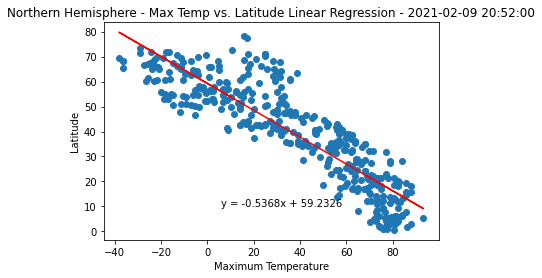

In [15]:
x_max_temp = np.array(n_hemi_df['Maximum Temperature'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression - {city_df['Date'][0]}")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernMaxTempLatitudeLinearRegression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

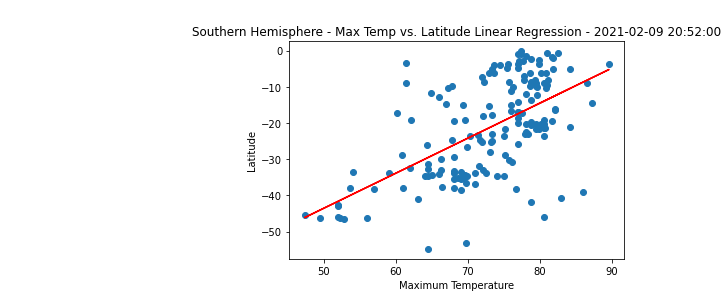

In [16]:
x_max_temp = np.array(s_hemi_df['Maximum Temperature'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_max_temp, y_lat)
regress_values = x_max_temp * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_max_temp,y_lat)
plt.plot(x_max_temp,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression - {city_df['Date'][0]}")
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernMaxTempLatitudeLinearRegression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

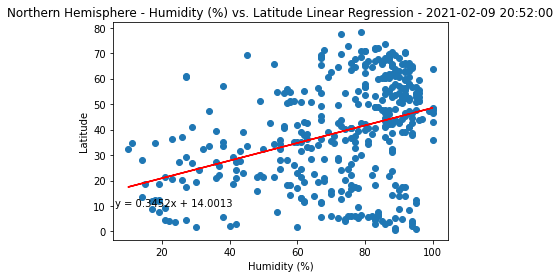

In [17]:
x_hum = np.array(n_hemi_df['Humidity'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression - {city_df['Date'][0]}")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.savefig('NorthernHumidityLatitudeLinearRegression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

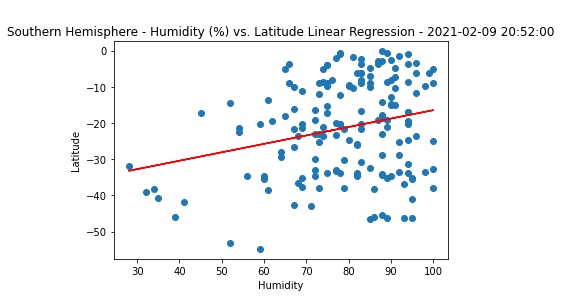

In [18]:
x_hum = np.array(s_hemi_df['Humidity'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_hum, y_lat)
regress_values = x_hum * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_hum,y_lat)
plt.plot(x_hum,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression - {city_df['Date'][0]}")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.savefig('SouthernHumidityLatitudeLinearRegression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
x_cloudiness = np.array(n_hemi_df['Cloudiness'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_cloudiness, y_lat)
regress_values = x_cloudiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_cloudiness,y_lat)
plt.plot(x_cloudiness,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression - {city_df['Date'][0]}")
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.savefig('NorthernCloudinessLatitudeLinearRegression.png')

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

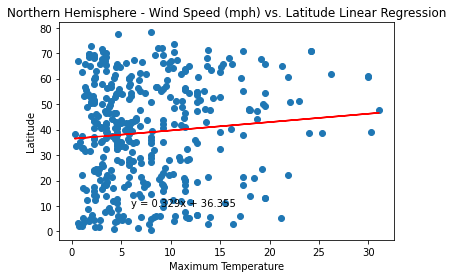

In [19]:
x_wind = np.array(n_hemi_df['Wind Speed'])
y_lat = np.array(n_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('NorthernWindSpeedLatitudeLinearRegression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

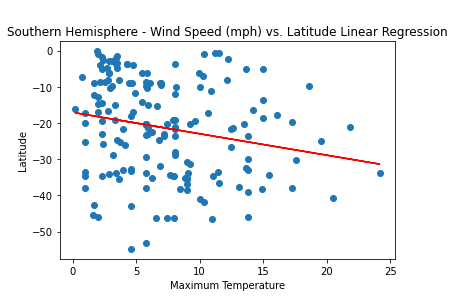

In [20]:
x_wind = np.array(s_hemi_df['Wind Speed'])
y_lat = np.array(s_hemi_df['Latitude'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_wind, y_lat)
regress_values = x_wind * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(x_wind,y_lat)
plt.plot(x_wind,regress_values,"r-")
plt.annotate(line_eq,(6,10))
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Maximum Temperature')
plt.ylabel('Latitude')
plt.savefig('SouthernWindSpeedLatitudeLinearRegression.png')